<a href="https://colab.research.google.com/github/samangelk/charts/blob/master/EIA_Storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from dateutil.parser import parse
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

def loaddata (seriesid, DataName):
    URL = "http://api.eia.gov/series/?api_key=f0aba5aabaa6bdc89d05019d0f93ecca&series_id=" + seriesid
    response = requests.get(url = URL)
    data = response.json()
    EIAData = data['series'][0]['data']
    dfEIAData = pd.DataFrame(EIAData)
    dfEIAData.columns = ['date',str(DataName)]
    dfEIAData['date'] = pd.to_datetime(dfEIAData['date'])
    dfEIAData= dfEIAData.set_index(dfEIAData['date'])
    dfEIAData = dfEIAData.drop('date', axis =1)
    return dfEIAData;

# add year and month
def addYearMonth (df):
  df['year'] = df.index.year
  df['month'] = df.index.month
  df['day'] = df.index.day  
  return df
# add x-axes dates
def addDateForPlot (df):
  df['date'] = df.index
  df['date_plot'] = df['date'].apply(lambda x: x.replace(year = 2019))
  #df['date_plot'] = df['date_plot'].apply(lambda x: x.strftime("%m/%d"))
  return df

#load NG data
dfTotal = loaddata('NG.NW2_EPG0_SWO_R48_BCF.W',"Total")
dfEast = loaddata('NG.NW2_EPG0_SWO_R31_BCF.W',"East")
dfWest = loaddata('NG.NW2_EPG0_SWO_R35_BCF.W',"West")
dfSouth = loaddata('NG.NW2_EPG0_SWO_R33_BCF.W',"South")
dfNonsalt = loaddata('NG.NW2_EPG0_SNO_R33_BCF.W',"Nonsalt")
dfSalt = loaddata('NG.NW2_EPG0_SSO_R33_BCF.W',"Salt")
dfMountain = loaddata('NG.NW2_EPG0_SWO_R34_BCF.W',"Mountain")
dfMidwest = loaddata('NG.NW2_EPG0_SWO_R32_BCF.W',"Midwest")
# make dataframe for natural gas
dfNG = pd.concat([dfTotal, dfEast, dfWest, dfSouth, dfNonsalt, dfSalt, dfMountain, dfMidwest], axis=1)

dfNG = addYearMonth(dfNG)
dfNG = addDateForPlot(dfNG)
yearsNG = dfNG['year'].unique()

print (yearsNG)
print (len(yearsNG))
print (dfNG.head())
dfNG.info() 

#load crude data
dfCrudeProduct = loaddata('PET.WTESTUS1.W',"Crude+Product")
dfCushing = loaddata('PET.W_EPC0_SAX_YCUOK_MBBL.W',"CushingExSPR")
dfCrudeInv = loaddata('PET.WCESTUS1.W',"CrudeInv")
dfGasoline = loaddata('PET.WGTSTUS1.W',"Gasoline")
dfDistillateFuel = loaddata('PET.WDISTUS1.W',"DistillateFuel")
dfUtilization = loaddata('PET.WPULEUS3.W',"Utilization")
dfProduction = loaddata('PET.WCRFPUS2.W',"Production")
dfNetImport = loaddata('PET.WTTNTUS2.W',"NetImport")
dfRefineryInput = loaddata('PET.WGIRIUS2.W',"RefineryInput")
dfCrudeInvChg = loaddata('PET.WCESTUS1.W',"CrudeInvChg")
# make dataframe for crude oil
dfCrude = pd.concat([dfCrudeProduct, dfCushing, dfCrudeInv, dfGasoline, dfDistillateFuel, dfUtilization, dfProduction, dfNetImport, dfRefineryInput, dfCrudeInvChg], axis=1)
dfCrude['ImpliedInvChg'] = dfCrude['Production'] + dfCrude['NetImport'] - dfCrude['RefineryInput'] 

dfCrude = addYearMonth(dfCrude)
dfCrude = dfCrude[dfCrude['year']>=2015] # some series missing earlier data
dfCrude = addDateForPlot(dfCrude)
yearsCrude = dfCrude['year'].unique()

print (yearsCrude)
print (len(yearsCrude))
print (dfCrude.tail())
dfCrude.info()


[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010]
11
            Total  East  West  South  ...  month  day       date  date_plot
date                                  ...                                  
2020-05-29   2714   536   273   1131  ...      5   29 2020-05-29 2019-05-29
2020-05-22   2612   504   264   1105  ...      5   22 2020-05-22 2019-05-22
2020-05-15   2503   469   253   1081  ...      5   15 2020-05-15 2019-05-15
2020-05-08   2422   452   240   1059  ...      5    8 2020-05-08 2019-05-08
2020-05-01   2319   424   228   1027  ...      5    1 2020-05-01 2019-05-01

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 544 entries, 2020-05-29 to 2010-01-01
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Total      544 non-null    int64         
 1   East       544 non-null    int64         
 2   West       544 non-null    int64         
 3   South      544 non-nu

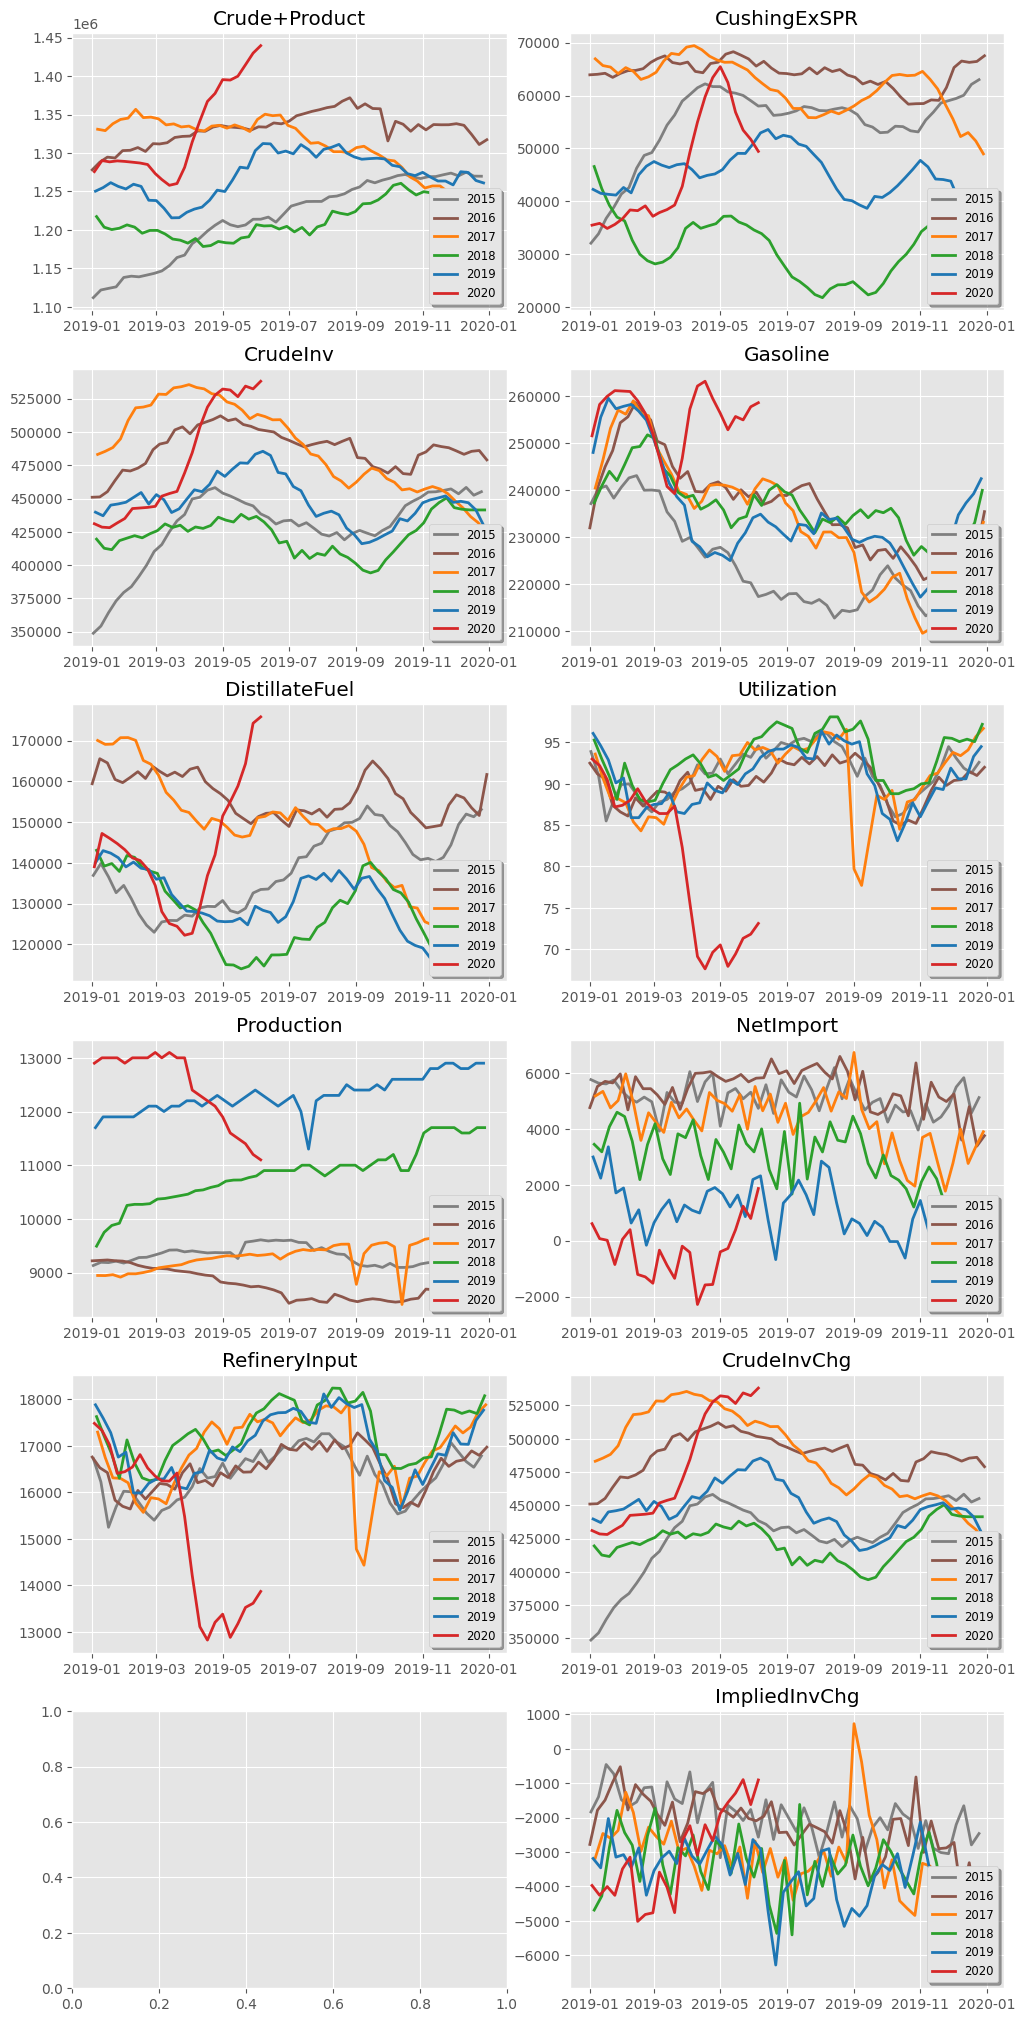

In [ ]:
# plot Crude storage

plt.style.use('ggplot') # chart style sheet 


# seasonality charting
def storagePlot(ax, fig, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out

mycolors = ['tab:grey', 'tab:brown', 'tab:orange', 'tab:green', 'tab:blue', 'tab:red', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue']
crudeSeries = ['Crude+Product',
               'CushingExSPR',
               'CrudeInv',
               'Gasoline',
               'DistillateFuel',
               'Utilization',
               'Production',
               'NetImport',
               'RefineryInput',
               'CrudeInvChg',
               'ImpliedInvChg']

# create 11 subplots
figCrude, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax11)) = plt.subplots(6,2,figsize = (10.3,20.4), dpi = 100, facecolor = 'w', edgecolor = 'w')
plt.tight_layout(pad=2, h_pad=2.1, w_pad=1.5)

axsCrude = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
for ax in range(11):
  for i, y in enumerate(yearsCrude):
    storagePlot(axsCrude[ax], figCrude, dfCrude.loc[dfCrude.year == y, 'date_plot'], dfCrude.loc[dfCrude.year == y, crudeSeries[ax]], {'color': mycolors[i],'label': yearsCrude[i],'linewidth':2.0 })
  axsCrude[ax].legend(loc='lower right', shadow=True, fontsize='small')
  axsCrude[ax].set_title(crudeSeries[ax])


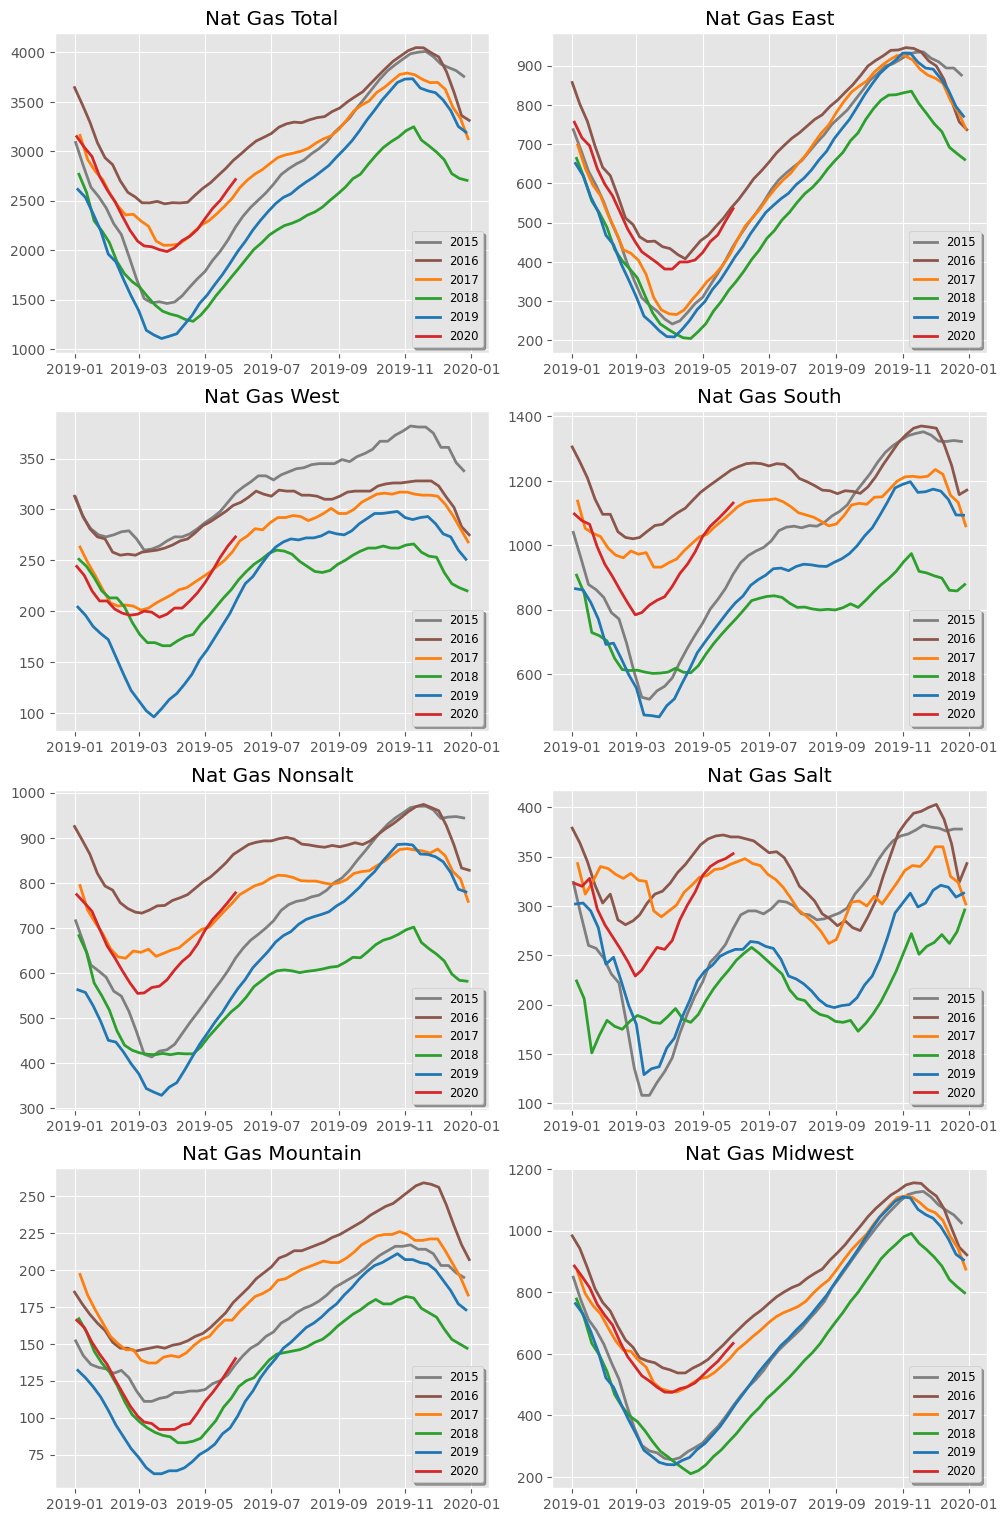

In [ ]:
# plot NG storage

plt.style.use('ggplot') # chart style sheet 

# seasonality charting
def storagePlot(ax, fig, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out

mycolors = ['tab:grey', 'tab:brown', 'tab:orange', 'tab:green', 'tab:blue', 'tab:red', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue']
yearsNG = [2015, 2016, 2017, 2018, 2019, 2020]
regionNG = ['Total', 'East', 'West', 'South', 'Nonsalt', 'Salt', 'Mountain', 'Midwest']

# create 8 subplots
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize = (10.3,15.4), dpi = 100, facecolor = 'w', edgecolor = 'w')
plt.tight_layout(pad=2, h_pad=2.1, w_pad=1.5)

axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for ax in range(8):
  for i, y in enumerate(yearsNG):
    storagePlot(axs[ax], fig, dfNG.loc[dfNG.year == y, 'date_plot'], dfNG.loc[dfNG.year == y, regionNG[ax]], {'color': mycolors[i],'label': yearsNG[i],'linewidth':2.0 })
  axs[ax].legend(loc='lower right', shadow=True, fontsize='small')
  axs[ax].set_title('Nat Gas ' + regionNG[ax])
